In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
df = pd.read_csv("crop_yield_train.csv")
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


In [432]:
df.isna().sum()

State            0
District         0
Crop             6
Crop_Year        0
Season           0
Area             0
Production    3967
Yield            0
dtype: int64

In [433]:
df.dropna(inplace=True)
df.isna().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [434]:
df.columns = df.columns.str.strip()
df[['State', 'District', 'Crop', 'Season']] = df[['State', 'District', 'Crop', 'Season']].apply(lambda x: x.str.strip().str.title())

In [435]:
#handling the duplicates
duplicated_rows = df[df.duplicated()]
duplicated_rows

,State,District,Crop,Crop_Year,Season,Area,Production,Yield


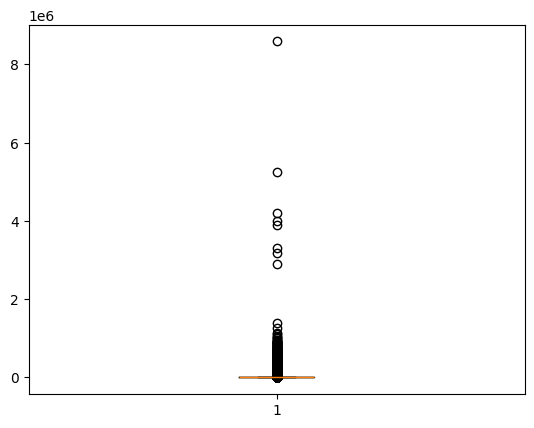

In [436]:
plt.boxplot(df['Area'])
plt.show()

In [437]:

q1 = df['Area'].quantile(0.25)
q3 = df['Area'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Area'] < lower_bound) | (df['Area'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 45157


In [438]:
df['Area'] = df['Area'].clip(lower_bound, upper_bound)

In [439]:
q1 = df['Production'].quantile(0.25)
q3 = df['Production'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Production'] < lower_bound) | (df['Production'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 47985


In [440]:
df['Production'] = df['Production'].clip(lower_bound, upper_bound)

In [441]:
q1 = df['Yield'].quantile(0.25)
q3 = df['Yield'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Yield'] < lower_bound) | (df['Yield'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 41104


In [442]:
df['Yield'] = df['Yield'].clip(lower_bound, upper_bound)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272298 entries, 0 to 276267
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       272298 non-null  object 
 1   District    272298 non-null  object 
 2   Crop        272298 non-null  object 
 3   Crop_Year   272298 non-null  int64  
 4   Season      272298 non-null  object 
 5   Area        272298 non-null  float64
 6   Production  272298 non-null  float64
 7   Yield       272298 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [444]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(df[['Area', 'Production', 'Yield']])


array([[1.29441008e-01, 4.22763316e-01, 1.00000000e+00],
       [1.23545264e-03, 5.04357085e-04, 1.29749768e-01],
       [3.70826008e-03, 4.48317409e-02, 1.00000000e+00],
       ...,
       [5.69790948e-01, 1.00000000e+00, 1.00000000e+00],
       [5.99085156e-03, 7.84555465e-04, 4.07784986e-02],
       [2.65341749e-02, 6.33248340e-03, 7.59962929e-02]],
      shape=(272298, 3))

In [445]:
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,Ramgarh,Potato,2013,Winter,1361.0,7544.0,5.395
1,Jammu And Kashmir,Reasi,Moong(Green Gram),2015,Kharif,13.0,9.0,0.700
2,Haryana,Gurgaon,Sweet Potato,2009,Whole Year,39.0,800.0,5.395
3,Uttar Pradesh,Jalaun,Sannhamp,2010,Kharif,9.0,3.0,0.330
4,Tamil Nadu,Madurai,Sugarcane,2006,Whole Year,6006.0,17844.5,5.395
...,...,...,...,...,...,...,...,...
276262,Jammu And Kashmir,Badgam,Potato,2014,Kharif,17.0,75.0,4.400
276263,Karnataka,Gadag,Castor Seed,2018,Kharif,13.0,7.0,0.540
276264,Tamil Nadu,Tiruchirappalli,Coconut,2002,Whole Year,5991.0,17844.5,5.395
276265,Karnataka,Chikkaballapura,Niger Seed,2017,Kharif,63.0,14.0,0.220


In [446]:
# Define features and target
target = 'Yield_normalized'
categorical_features = ['State', 'District', 'Crop', 'Season']
drop_columns = ['Production', 'Production_normalized', 'Yield']

df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,Ramgarh,Potato,2013,Winter,1361.0,7544.0,5.395
1,Jammu And Kashmir,Reasi,Moong(Green Gram),2015,Kharif,13.0,9.0,0.700
2,Haryana,Gurgaon,Sweet Potato,2009,Whole Year,39.0,800.0,5.395
3,Uttar Pradesh,Jalaun,Sannhamp,2010,Kharif,9.0,3.0,0.330
4,Tamil Nadu,Madurai,Sugarcane,2006,Whole Year,6006.0,17844.5,5.395
...,...,...,...,...,...,...,...,...
276262,Jammu And Kashmir,Badgam,Potato,2014,Kharif,17.0,75.0,4.400
276263,Karnataka,Gadag,Castor Seed,2018,Kharif,13.0,7.0,0.540
276264,Tamil Nadu,Tiruchirappalli,Coconut,2002,Whole Year,5991.0,17844.5,5.395
276265,Karnataka,Chikkaballapura,Niger Seed,2017,Kharif,63.0,14.0,0.220


In [447]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [448]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in categorical_features:
    X_train_encoded[col] = X_train[col].astype('category').cat.codes
    X_test_encoded[col] = X_test[col].astype('category').cat.codes


In [449]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train_encoded[['State', 'District','Crop','Crop_Year', 'Season']])

array([[0.08333333, 0.62695035, 0.14814815, 0.52173913, 0.2       ],
       [0.91666667, 0.47801418, 0.87037037, 0.95652174, 0.8       ],
       [0.02777778, 0.96737589, 0.75925926, 0.7826087 , 0.2       ],
       ...,
       [1.        , 0.24255319, 0.81481481, 0.13043478, 0.8       ],
       [0.05555556, 0.54042553, 0.83333333, 0.95652174, 0.2       ],
       [0.94444444, 0.18156028, 0.5       , 0.        , 0.6       ]],
      shape=(217838, 5))

In [450]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = X_train_encoded.select_dtypes(include=[np.number]).columns.tolist()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [451]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [452]:
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

catboost_model.fit(X_train, y_train, cat_features=categorical_features)

y_pred_cat = catboost_model.predict(X_test)

In [453]:
cat_rmse = mean_squared_error(y_test, y_pred_cat)
r2_score(y_test, y_pred_cat)


0.9130379090742538

In [454]:
from sklearn.neural_network import MLPRegressor

In [455]:
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

In [456]:
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_mlp

array([0.50683734, 0.38152302, 0.98511559, ..., 0.4724519 , 0.19399716,
       0.26129548], shape=(54460,))

In [457]:
mlp_rmse = mean_squared_error(y_test, y_pred_mlp)
r2_score(y_test, y_pred_mlp)

0.7272908194172891

In [458]:
import lightgbm as lgb

In [459]:
lgb_train = lgb.Dataset(X_train_encoded, y_train, categorical_feature=categorical_features, free_raw_data=False)
lgb_test = lgb.Dataset(X_test_encoded, y_test, reference=lgb_train)

In [460]:
lgbm_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'random_state': 42
}

lgb_model = lgb.train(lgbm_params, lgb_train, num_boost_round=100, valid_sets=[lgb_test])

y_pred_lgb = lgb_model.predict(X_test_encoded)

In [461]:
lgb_rmse = mean_squared_error(y_test, y_pred_lgb)
r2_score(y_test, y_pred_lgb)

0.8748311946744768

In [462]:
# Pick a random test sample (can use .iloc[n] to manually pick one)
sample_index = 0
sample_raw = X_test.iloc[[sample_index]]
sample_encoded = X_test_encoded.iloc[[sample_index]]
sample_scaled = X_test_scaled.iloc[[sample_index]]

# Show the sample input
print("🎯 Sample input (raw):")
print(sample_raw.T)


🎯 Sample input (raw):
                               253935
State                       Karnataka
District                      Ballari
Crop                            Jowar
Crop_Year                        2007
Season                         Summer
Area                            967.0
Area_normalized              0.091968
Area_CropYear               1940769.0
Years_Since_2000                    7
Is_Post_Green_Revolution            1
Area_Normalized_District     0.246951
Simulated_Rainfall        1032.877347
Simulated_Soil_pH            6.729198
Simulated_NDVI               0.514961
Simulated_Temperature       23.097062


In [463]:
# CatBoost (uses raw data)
pred_cat = catboost_model.predict(sample_raw)[0]

# LightGBM (uses encoded data)
pred_lgb = lgb_model.predict(sample_encoded)[0]

# Neural Net (uses scaled numeric data)
pred_mlp = mlp_model.predict(sample_scaled)[0]

print("\n📈 Predictions for sample input:")
print(f"CatBoost Prediction     : {pred_cat:.2f}")
print(f"LightGBM Prediction     : {pred_lgb:.2f}")
print(f"Neural Net Prediction   : {pred_mlp:.2f}")
print(f"Actual Yield            : {y_test.iloc[sample_index]:.2f}")



📈 Predictions for sample input:
CatBoost Prediction     : 0.38
LightGBM Prediction     : 0.32
Neural Net Prediction   : 0.51
Actual Yield            : 0.44


c:\Users\sjai5\Desktop\deep_data_hackathon\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


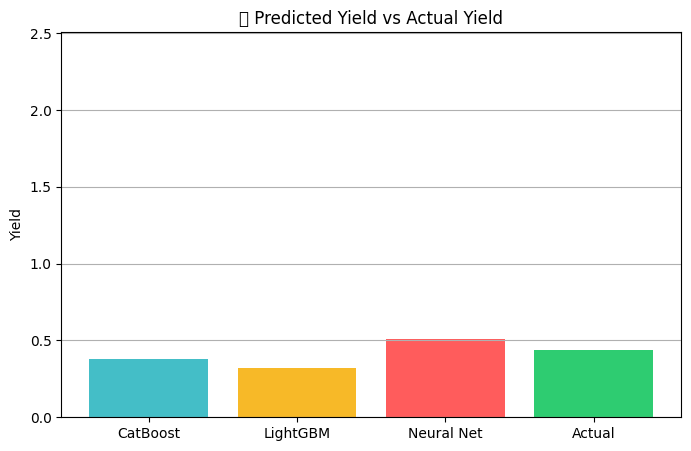

In [464]:
import matplotlib.pyplot as plt

models = ['CatBoost', 'LightGBM', 'Neural Net', 'Actual']
values = [pred_cat, pred_lgb, pred_mlp, y_test.iloc[sample_index]]

plt.figure(figsize=(8,5))
plt.bar(models, values, color=['#44bec7', '#f7b928', '#ff5c5c', '#2ecc71'])
plt.title("📊 Predicted Yield vs Actual Yield")
plt.ylabel("Yield")
plt.ylim(0, max(values) + 2)
plt.grid(axis='y')
plt.show()


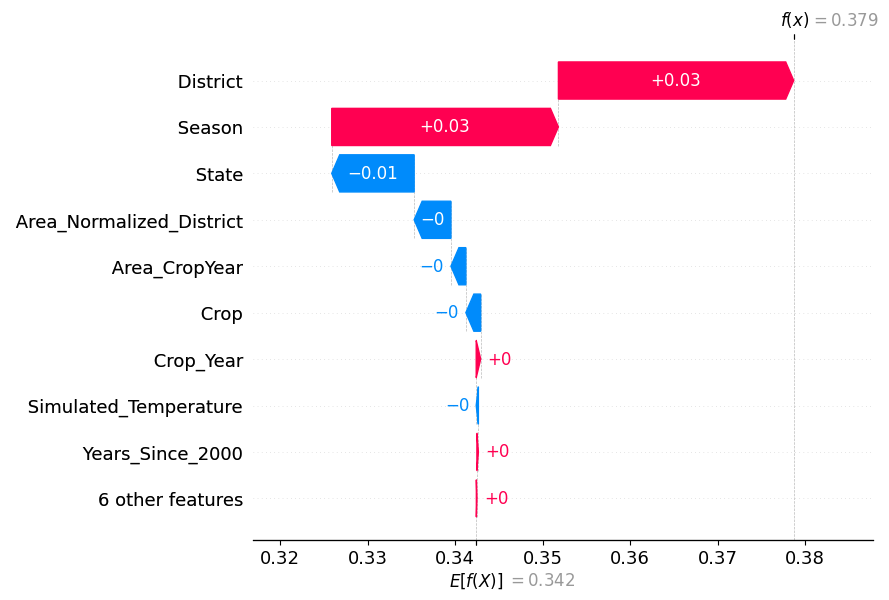

<Figure size 640x480 with 0 Axes>

In [465]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Choose the sample you want to explain
sample_index = 0  # adjust as needed
sample = X_test.iloc[[sample_index]]

# For classification models (especially binary), use class index
if isinstance(shap_values, list):
    class_index = 1  # typically class 1 is the positive class
    shap_values_sample = shap_values[class_index][sample_index]
else:
    shap_values_sample = shap_values[sample_index]

# Plot a bar chart of SHAP values for that sample
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[class_index] if isinstance(shap_values, list) else explainer.expected_value,
    shap_values_sample,
    feature_names=sample.columns,
    features=sample.values[0]
)

# Show the plot4-
plt.tight_layout()
plt.show()


C:\Users\sjai5\AppData\Local\Temp\ipykernel_2500\3601250619.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


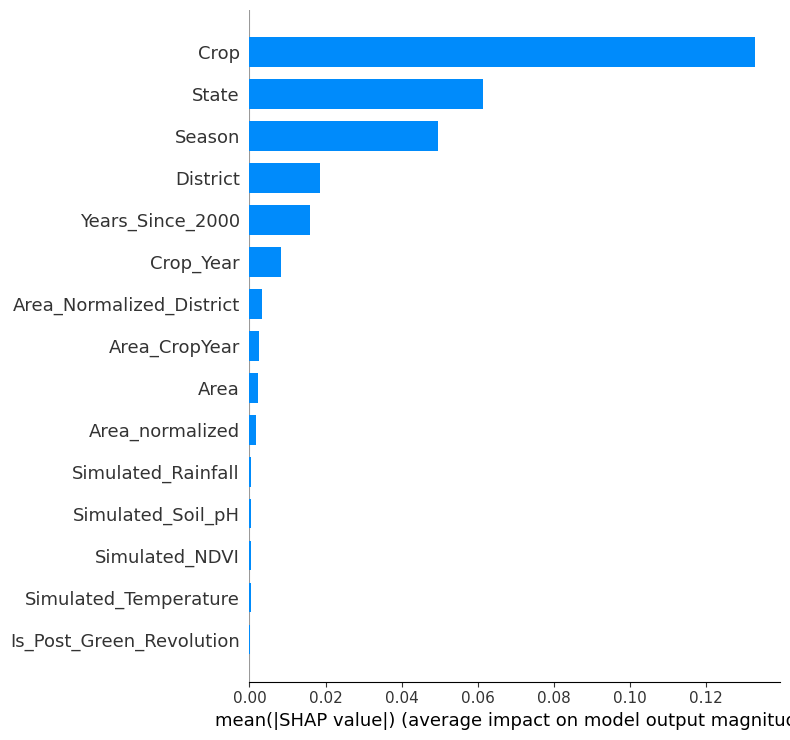

In [466]:
# Summary plot shows top features globally
shap.summary_plot(shap_values, X_test, plot_type="bar")


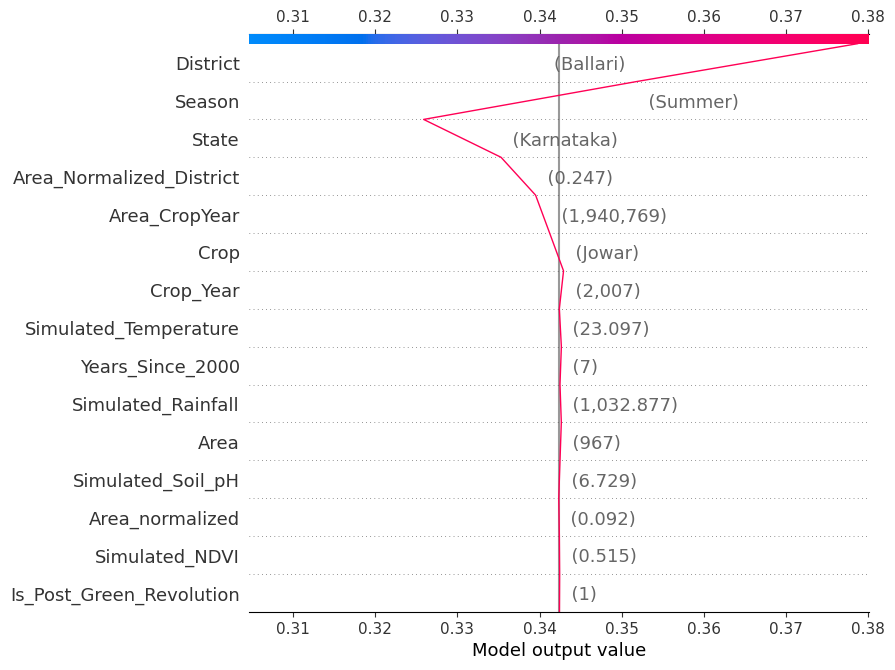

In [467]:
shap.decision_plot(explainer.expected_value, shap_values[sample_index], sample)